# Clustering stocks using KMeans

<b>Dataset:</b> <i> Company Stock Movements.csv</i>

In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array movements of daily price movements from 2010 to 2015, where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

#### Normalizer vs StandardScaler 
Note that Normalizer() is different to StandardScaler(). While StandardScaler() standardizes features by removing the mean and scaling to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other.

## Import Libraries

### Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

### Additional Libraries

In [16]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

## Load and Explore the Dataset

In [27]:
#Load the Dataset
df = pd.read_csv('./Company Stock Movements.csv', index_col=0)

In [28]:
#View the Dataset
df.head()

,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,15/01/2010,...,16/10/2013,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [29]:
#Describe the data
df.describe()

,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,15/01/2010,...,16/10/2013,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.277166,0.079334,-0.327333,-0.081833,0.475168,-0.291500,-0.101167,0.528000,0.303666,-0.674500,...,0.765817,0.906833,1.016166,-0.152833,0.177250,0.543083,0.311498,-0.083667,0.280001,0.274500
std,0.679217,0.793585,2.380234,2.138296,1.433856,1.118415,1.121530,1.508851,1.047321,1.831198,...,1.788782,1.824133,4.745266,1.823094,1.308681,4.159633,1.868696,2.118430,0.922479,3.488336
min,-2.350006,-3.189984,-17.599998,-15.299993,-2.020004,-4.770012,-7.170008,-0.469994,-1.790001,-13.340041,...,-0.810002,-4.200020,-1.020004,-8.159984,-6.540016,-5.029984,-6.320089,-13.620034,-1.760009,-19.589981
25%,0.040002,-0.167501,-0.212501,-0.122502,-0.025000,-0.340000,-0.185000,0.017501,-0.082495,-0.605000,...,0.095002,0.280000,-0.060001,-0.332497,-0.015002,-0.279998,-0.197502,-0.202501,-0.097504,-0.035000
50%,0.295000,0.010000,-0.005000,0.084993,0.150000,-0.059997,0.070000,0.205002,0.139999,-0.360000,...,0.335005,0.454998,0.035002,0.000000,0.175000,-0.085000,0.025001,-0.005000,0.070002,0.149998
75%,0.580000,0.325004,0.259999,0.380000,0.555002,0.112501,0.330001,0.507500,0.392499,-0.137500,...,0.805000,1.139999,0.345000,0.192502,0.577495,0.147498,0.382500,0.299998,0.400001,0.422499
max,3.029999,3.139999,1.630005,3.349991,10.020000,3.179996,1.479996,10.599985,5.949977,0.839996,...,12.160008,11.949997,34.830004,9.590019,4.820008,30.409929,10.140000,4.790009,5.910034,17.139948


## Normalize the Dataset

In [37]:
# normalized_df = preprocessing.normalize(df, axis=0)
transformer = preprocessing.Normalizer().fit(df)
normalized = transformer.transform(df)
normalized

array([[ 0.00302051, -0.00114574, -0.01775851, ..., -0.02791349,
         0.00437463, -0.10202026],
       [-0.02599391, -0.02639998, -0.00852927, ..., -0.00162466,
        -0.01624623,  0.02680614],
       [-0.02208986,  0.01184398, -0.02208986, ...,  0.04502568,
        -0.01654394,  0.03515588],
       ...,
       [ 0.01981027,  0.01059598,  0.02626006, ..., -0.01197837,
         0.01842816,  0.02211388],
       [ 0.0200991 ,  0.00223323, -0.01786587, ..., -0.0066997 ,
         0.00446647, -0.0066997 ],
       [ 0.01796837,  0.00112314,  0.        , ..., -0.00673829,
         0.02919855,  0.01123007]])

## Run K Means
<i> Make sure to use the Normalized dataset and set random_state to 30 </i>

### Find the optimal k

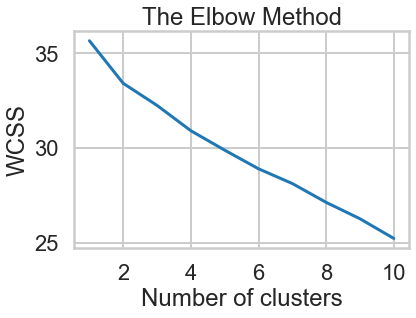

In [57]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 30)
    kmeans.fit(normalized)
    # kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# TODO: FIND OPTIMAL K

In [40]:
#Instantiate the Algorithm
kmeans = KMeans(n_clusters=4, max_iter=1000, random_state=30)

#Fit to the data
kmeans.fit(normalized)

KMeans(max_iter=1000, n_clusters=4, random_state=30)

In [47]:
#Output of K-Means is the cluster label
k3_labels = kmeans.labels_

#Attach labels to the original DataFrame
df_k3 = df.copy()
df_k3['Label'] = k3_labels

### Run K Means

In [49]:
#View the dataset
df_k3.head()


,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,15/01/2010,...,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013,Label
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981,0
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000,2
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021,0
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001,2
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998,0


### List Stocks and their Labels / Clusters in a DataFrame to report which Stocks move together

## Run Hierarchichal Clustering and Visualize as a Dendogram